In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
ss=pd.read_csv("crimes.csv")

In [3]:
ss

,STATE-todel,DISTRICT,MURDER,RAPE,THEFT,DOWRY DEATHS,YEAR
0,Tamil nadu,Ariyalur,27,20,76,1,2010
1,Tamil nadu,Chennai,103,47,1540,16,2010
2,Tamil nadu,Chennai rly,0,0,232,2,2010
3,Tamil nadu,Chennai city,86,29,750,18,2010
4,Tamil nadu,Coimbatore,41,13,425,1,2010
...,...,...,...,...,...,...,...
312,Tamil nadu,Trichy,40,14,143,3,2018
313,Tamil nadu,Trichy City,18,1,466,1,2018
314,Tamil nadu,Vellore,75,7,411,0,2018
315,Tamil nadu,Villupuram,59,29,421,4,2018


In [4]:
ss.loc[ss['DISTRICT']=='Ariyalur', 'DISTRICT'] = 0
ss.loc[ss['DISTRICT']=='Chennai', 'DISTRICT'] = 1
ss.loc[ss['DISTRICT']=='Chennai rly', 'DISTRICT'] = 2
ss.loc[ss['DISTRICT']=='Chennai city', 'DISTRICT'] = 3
ss.loc[ss['DISTRICT']=='Coimbatore', 'DISTRICT'] = 4
ss.loc[ss['DISTRICT']=='Coimbatore City', 'DISTRICT'] = 5
ss.loc[ss['DISTRICT']=='Cuddalore', 'DISTRICT'] = 6
ss.loc[ss['DISTRICT']=='Dharmapuri', 'DISTRICT'] = 7
ss.loc[ss['DISTRICT']=='Dindigul', 'DISTRICT'] = 8
ss.loc[ss['DISTRICT']=='Erode', 'DISTRICT'] = 9
ss.loc[ss['DISTRICT']=='Kanchipuram', 'DISTRICT'] = 10
ss.loc[ss['DISTRICT']=='Kanyakumari', 'DISTRICT'] = 11
ss.loc[ss['DISTRICT']=='Karur', 'DISTRICT'] = 12
ss.loc[ss['DISTRICT']=='Krishnagiri', 'DISTRICT'] = 13
ss.loc[ss['DISTRICT']=='Madurai', 'DISTRICT'] = 14
ss.loc[ss['DISTRICT']=='Madurai City', 'DISTRICT'] = 15
ss.loc[ss['DISTRICT']=='Nagapattinam', 'DISTRICT'] = 16
ss.loc[ss['DISTRICT']=='Namakkal', 'DISTRICT'] = 17
ss.loc[ss['DISTRICT']=='Nilgiris', 'DISTRICT'] = 18
ss.loc[ss['DISTRICT']=='Perambalur', 'DISTRICT'] = 19
ss.loc[ss['DISTRICT']=='Pudukottai', 'DISTRICT'] = 20 
ss.loc[ss['DISTRICT']=='Ramnathapuram', 'DISTRICT'] = 21
ss.loc[ss['DISTRICT']=='Salem', 'DISTRICT'] = 22
ss.loc[ss['DISTRICT']=='Salem City', 'DISTRICT'] = 23
ss.loc[ss['DISTRICT']=='Sivagangai', 'DISTRICT'] = 24
ss.loc[ss['DISTRICT']=='Thanjavur', 'DISTRICT'] = 25
ss.loc[ss['DISTRICT']=='Theni', 'DISTRICT'] = 26
ss.loc[ss['DISTRICT']=='Thirunelveli', 'DISTRICT'] = 27
ss.loc[ss['DISTRICT']=='Thirunelveli City', 'DISTRICT'] = 28
ss.loc[ss['DISTRICT']=='Thiruvallur', 'DISTRICT'] = 29
ss.loc[ss['DISTRICT']=='Thiruvannamalai', 'DISTRICT'] = 30
ss.loc[ss['DISTRICT']=='Thiruvarur', 'DISTRICT'] = 31
ss.loc[ss['DISTRICT']=='Thoothukudi', 'DISTRICT'] = 32
ss.loc[ss['DISTRICT']=='Tiruppur', 'DISTRICT'] = 33
ss.loc[ss['DISTRICT']=='Trichy rly', 'DISTRICT'] = 34
ss.loc[ss['DISTRICT']=='Trichy', 'DISTRICT'] = 35
ss.loc[ss['DISTRICT']=='Trichy City', 'DISTRICT'] = 36
ss.loc[ss['DISTRICT']=='Vellore', 'DISTRICT'] = 37
ss.loc[ss['DISTRICT']=='Villupuram', 'DISTRICT'] = 38
ss.loc[ss['DISTRICT']=='Virudhunagar', 'DISTRICT'] = 39
ss.loc[ss['DISTRICT']=='Railway Chennai', 'DISTRICT'] = 40
ss.loc[ss['DISTRICT']=='Railway Trichy', 'DISTRICT'] = 41
ss.loc[ss['DISTRICT']=='Thoothugudi', 'DISTRICT'] = 42
ss.loc[ss['DISTRICT']=='Tiruppur City', 'DISTRICT'] = 43


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ss["STATE-todel"]=le.fit_transform(ss["STATE-todel"].astype("str"))
ss["STATE-todel"].value_counts()

0    317
Name: STATE-todel, dtype: int64

In [6]:
ss

,STATE-todel,DISTRICT,MURDER,RAPE,THEFT,DOWRY DEATHS,YEAR
0,0,0,27,20,76,1,2010
1,0,1,103,47,1540,16,2010
2,0,2,0,0,232,2,2010
3,0,3,86,29,750,18,2010
4,0,4,41,13,425,1,2010
...,...,...,...,...,...,...,...
312,0,35,40,14,143,3,2018
313,0,36,18,1,466,1,2018
314,0,37,75,7,411,0,2018
315,0,38,59,29,421,4,2018


In [7]:
from sklearn import preprocessing
crime_rates_standardized = preprocessing.scale(ss)
print(crime_rates_standardized)
crime_rates_standardized = pd.DataFrame(crime_rates_standardized)

[[ 0.         -1.75706196 -0.61982563 ... -0.58422269 -0.48807543
  -1.42693378]
 [ 0.         -1.6724261   1.97268116 ...  2.62374178  4.23860209
  -1.42693378]
 [ 0.         -1.58779023 -1.54084778 ... -0.24239041 -0.17296359
  -1.42693378]
 ...
 [ 0.          1.37446513  1.01754708 ...  0.14984022 -0.80318726
   1.60380664]
 [ 0.          1.45910099  0.47175617 ...  0.17175254  0.45726008
   1.60380664]
 [ 0.          1.54373686  0.53998004 ... -0.38701176 -0.80318726
   1.60380664]]


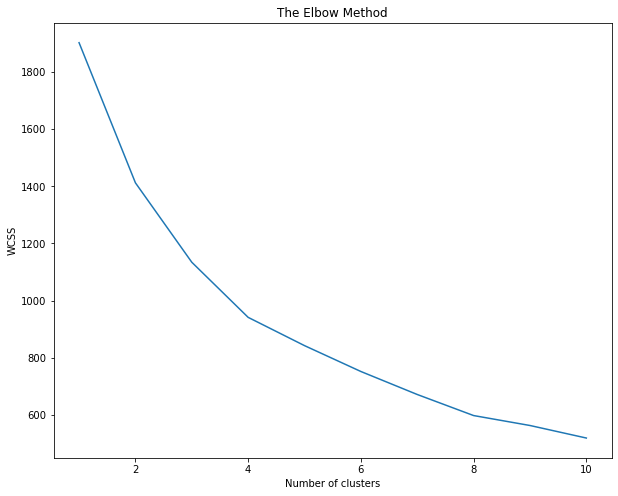

In [9]:
103
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_rates_standardized)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_rates_standardized)

y_kmeanskmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_rates_standardized)

y_kmeans

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
import pickle

pickle.dump(kmeans,open('kmean.pkl','wb'))
rap = pickle.load(open('kmean.pkl','rb'))

In [12]:
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
ss['cluster'] = cluster

In [13]:
kmeans_mean_cluster = pd.DataFrame(round(ss.groupby('cluster').mean(),1))
kmeans_mean_cluster

,STATE-todel,MURDER,RAPE,THEFT,DOWRY DEATHS,YEAR
cluster,,,,,,
1,0,37.7,9.8,271.7,1.7,2014.0
2,0,90.2,41.3,771.2,7.6,2012.3


In [14]:
ss[ss['cluster']==1]

,STATE-todel,DISTRICT,MURDER,RAPE,THEFT,DOWRY DEATHS,YEAR,cluster
0,0,0,27,20,76,1,2010,1
2,0,2,0,0,232,2,2010,1
4,0,4,41,13,425,1,2010,1
5,0,5,22,15,1084,1,2010,1
7,0,7,59,15,161,6,2010,1
...,...,...,...,...,...,...,...,...
312,0,35,40,14,143,3,2018,1
313,0,36,18,1,466,1,2018,1
314,0,37,75,7,411,0,2018,1
315,0,38,59,29,421,4,2018,1


In [15]:
ss[ss['cluster']==2]

,STATE-todel,DISTRICT,MURDER,RAPE,THEFT,DOWRY DEATHS,YEAR,cluster
1,0,1,103,47,1540,16,2010,2
3,0,3,86,29,750,18,2010,2
6,0,6,58,27,241,8,2010,2
14,0,14,59,17,348,14,2010,2
22,0,22,81,53,221,4,2010,2
27,0,27,83,48,445,3,2010,2
32,0,32,84,32,336,3,2010,2
37,0,37,82,30,656,8,2010,2
38,0,38,63,50,287,4,2010,2
41,0,1,168,76,2866,20,2011,2


In [16]:
ss

,STATE-todel,DISTRICT,MURDER,RAPE,THEFT,DOWRY DEATHS,YEAR,cluster
0,0,0,27,20,76,1,2010,1
1,0,1,103,47,1540,16,2010,2
2,0,2,0,0,232,2,2010,1
3,0,3,86,29,750,18,2010,2
4,0,4,41,13,425,1,2010,1
...,...,...,...,...,...,...,...,...
312,0,35,40,14,143,3,2018,1
313,0,36,18,1,466,1,2018,1
314,0,37,75,7,411,0,2018,1
315,0,38,59,29,421,4,2018,1


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


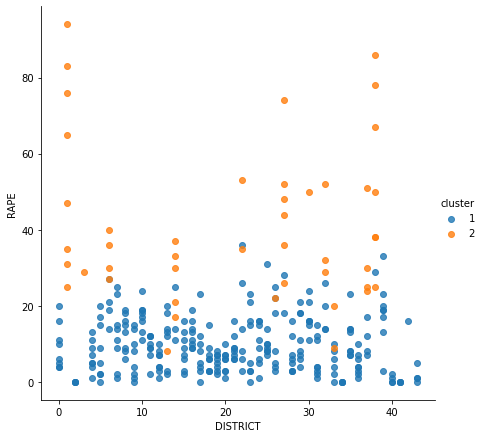

In [24]:
import seaborn as sns
sns.lmplot('DISTRICT' ,'RAPE', data=ss,
        hue = "cluster",
        fit_reg=False, size = 6 );

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


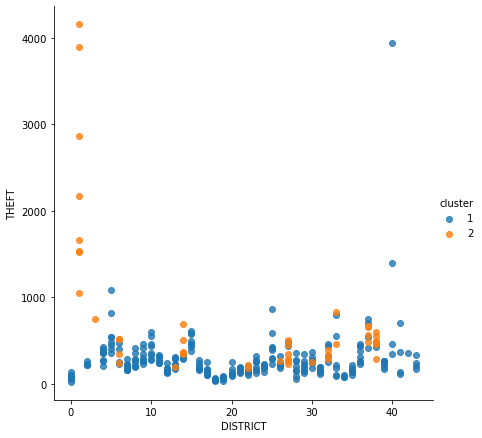

In [25]:
import seaborn as sns
sns.lmplot('DISTRICT' ,'THEFT', data=ss,
        hue = "cluster",
        fit_reg=False, size = 6 );

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


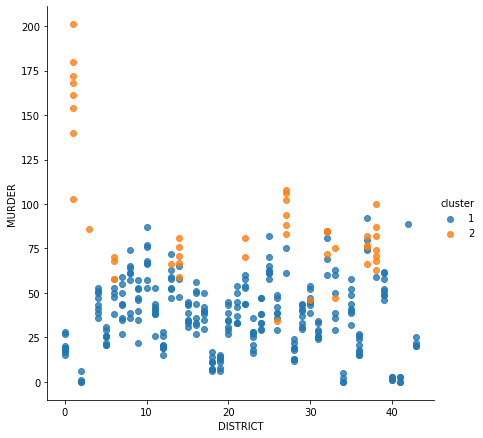

In [26]:
import seaborn as sns
sns.lmplot('DISTRICT' ,'MURDER', data=ss,
        hue = "cluster",
        fit_reg=False, size = 6 );

In [28]:
plt.rcParams["figure.figsize"] = (15,5)

<AxesSubplot:xlabel='DISTRICT', ylabel='RAPE'>

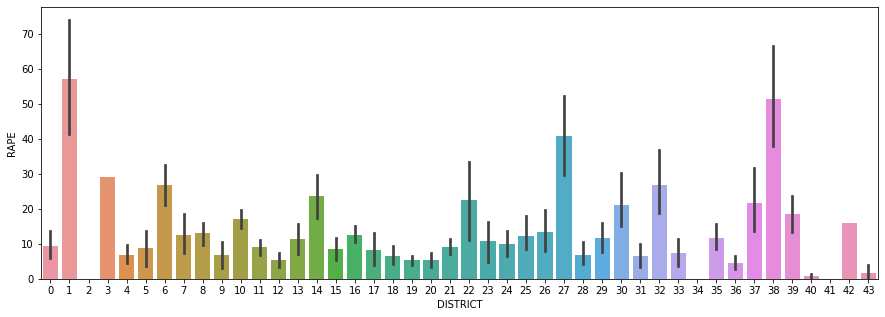

In [29]:
sns.barplot(x='DISTRICT', y='RAPE', data=ss)

<AxesSubplot:xlabel='DISTRICT', ylabel='THEFT'>

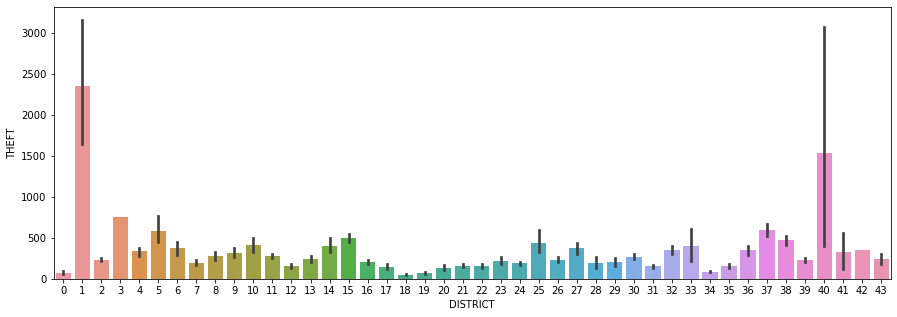

In [30]:
sns.barplot(x='DISTRICT', y='THEFT', data=ss)

<AxesSubplot:xlabel='DISTRICT', ylabel='MURDER'>

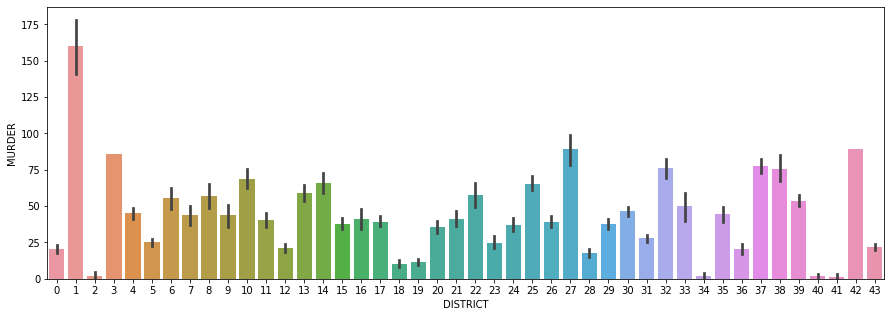

In [31]:
sns.barplot(x='DISTRICT', y='MURDER', data=ss)